In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df=pd.read_csv('bank_with_missing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,NaN,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
#here the sahpe of the data is 45,211 rows and 17 columns

In [5]:
df.isna().sum()

age          100
job          120
marital        0
education      0
default        0
balance       80
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
#age has 100 NA values, job has 120 NA valus and balance has 80 NA values. Other columns have no NA values 

In [7]:
#age(numeric): Fill missing values with mean
mean_age = df['age'].mean()
mean_age

40.937398860588324

In [8]:
df['age'] = df['age'].fillna(mean_age)

In [9]:
#job(categorical): Fill missing values with Mode
mode_job=df['job'].mode()[0]
mode_job

'blue-collar'

In [10]:
df['job'] = df['job'].fillna(mode_job)

In [11]:
#balance (numeric): Drop rows where balanceis Nan
df = df.dropna(subset=["balance"])

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#Obsv: 1)The Na values in Age is replaced by Mean of the age that is 40.93.
#      2)The Na values in Job is Replaced by Mode of the Jod that is 'blue-collar'.
#      3)The NaN values in balnce has been removed.

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.000000,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.000000,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.000000,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.000000,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
#The shape of the data set has changed and the count of null values have become zero

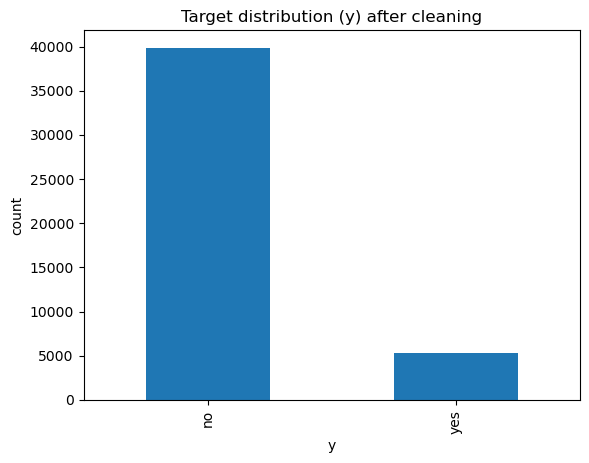

In [16]:
#Optional sanity check visuals (kept minimal)
import matplotlib.pyplot as plt

plt.figure()
df['y'].value_counts().plot(kind='bar')
plt.title("Target distribution (y) after cleaning")
plt.xlabel("y")
plt.ylabel("count")
plt.show()

In [17]:
# The target value is imbalanced and No is 8 times more then Yes.

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column == 'y':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [20]:
#One-hot encoder the features (excluding target
X_raw = df.drop(columns= ['y'])
Y= df['y']
X= pd.get_dummies(X_raw,drop_first = True)

X= pd.get_dummies(X).astype(int) # makes combination ex. female + all clomns, male + all columns (1x 10 for male and female both)
X.head()  # one hot encoder \

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,40,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
#Do a stratified train/test split (80/20)
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X,Y, test_size=0.2, random_state=42,stratify=Y)

In [22]:
X_train_s.shape

(36104, 42)

In [23]:
Y_train_s.shape

(36104,)

In [24]:
X_test_s.shape

(9027, 42)

In [25]:
Y_test_s.shape

(9027,)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

print('Dataset shape:', df.shape)
print('Class Distribution: \n',Y.value_counts(normalize=True))

Dataset shape: (45131, 17)
Class Distribution: 
 y
0    0.883118
1    0.116882
Name: proportion, dtype: float64


In [27]:
scaler = StandardScaler() 
X_train_s = scaler.fit_transform(X_train_s) #fit is used to cal mean and Sdt Diviation
X_test_s = scaler.transform(X_test_s)

In [28]:
X_train_s[0:5]

array([[-1.30952447,  0.27528573,  0.02306888, -0.49994933, -0.56994964,
         2.82781954,  0.17556126,  1.88231188, -0.18203527, -0.16729899,
        -0.51110767, -0.23000374, -0.18929916, -0.31775253, -0.14345356,
        -0.44755543, -0.17162324, -0.0781206 ,  0.81110785, -0.62758999,
         0.96885395, -0.64176064, -0.20528746, -0.13635316,  0.89416524,
        -0.43811475, -0.26090397, -0.63445475, -0.40070496, -0.07078544,
        -0.24718845, -0.17851375, -0.42506417, -0.36390359, -0.1028617 ,
        -0.66272854, -0.30874243, -0.12911399, -0.11322612,  4.92776959,
        -0.18421639, -2.12435937],
       [ 0.10585839,  0.37362345,  1.22249107, -0.29205621, -0.24582366,
        -0.41001747, -0.24125097, -0.53126159, -0.18203527, -0.16729899,
         1.95653492, -0.23000374, -0.18929916, -0.31775253, -0.14345356,
        -0.44755543, -0.17162324, -0.0781206 ,  0.81110785, -0.62758999,
        -1.03214731,  1.55821336, -0.20528746, -0.13635316, -1.11836152,
        -0.43811

In [ ]:
# Logistic Regression (max_iter=1000)
# Decision Tree (Use a reasonable depth, e.g., max_depth=5)
#Evaluate both on Test set using
# Accuracy
# Confusion Matrix
# ROC Curve + AOC

In [29]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression() #classification is an instance(obj)
classifier.fit(X_train_s, Y_train_s)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [31]:
model_s = LogisticRegression(max_iter=1000)
model_s.fit(X_train_s, Y_train_s)
Y_pred_s = model_s.predict(X_test_s)

print("stratified train_test_split results:")
print("Accuracy:",accuracy_score(Y_test_s, Y_pred_s))

stratified train_test_split results:
Accuracy: 0.9008529965658579


In [32]:
print("Confusion Matrix:\n", confusion_matrix(Y_test_s, Y_pred_s))

Confusion Matrix:
 [[7738  234]
 [ 661  394]]


In [33]:
print(classification_report(Y_test_s,Y_pred_s, digits=3))
print("\n---\n")

              precision    recall  f1-score   support

           0      0.921     0.971     0.945      7972
           1      0.627     0.373     0.468      1055

    accuracy                          0.901      9027
   macro avg      0.774     0.672     0.707      9027
weighted avg      0.887     0.901     0.890      9027


---



In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [35]:
y_pred_proba = model_s.predict_proba(X_test_s)[:, 1]

In [36]:
auc_score = roc_auc_score(Y_test_s, y_pred_proba)
print(f"AUC Score: {auc_score:.3f}")

AUC Score: 0.905


In [52]:
# Calculate ROC curve metrics

fpr, tpr, thresholds = roc_curve(Y_test_s, y_pred_proba)

AUC Score: 0.905


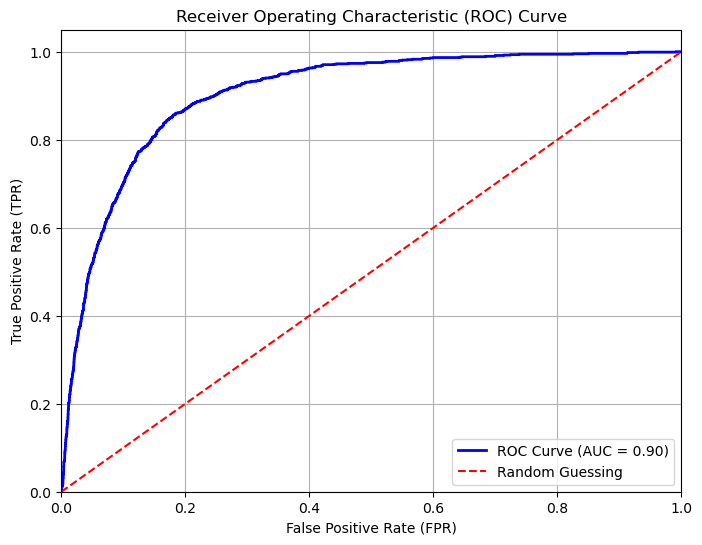

In [88]:
# ROC 
# ROC Rate
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

# Get predicted probabilities for the positive class (ATTORNEY = 1)
Y_pred_proba = classifier.predict_proba(X_test_s)[:, 1]  # Probabilities for class 1 , : stands for all

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(Y_test_s, Y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(Y_test_s, Y_pred_proba)
print(f"AUC Score: {auc_score:.3f}")  # Prints AUC with 3 decimal precision, {} aka place holder

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, 
         label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.grid(True)

# Show plot
plt.show()

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf_gini= DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=0)

In [42]:
clf_gini.fit(X_train_s, Y_train_s)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
Y_pred_gini = clf_gini.predict(X_test_s)

In [66]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
print('Model accuracy with gini index: {0:0.4f}'. format(accuracy_score(Y_test_s,Y_pred_gini)))

Model accuracy with gini index: 0.8995


In [48]:
print(classification_report(Y_test_s, Y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7972
           1       0.62      0.36      0.46      1055

    accuracy                           0.90      9027
   macro avg       0.77      0.67      0.70      9027
weighted avg       0.89      0.90      0.89      9027



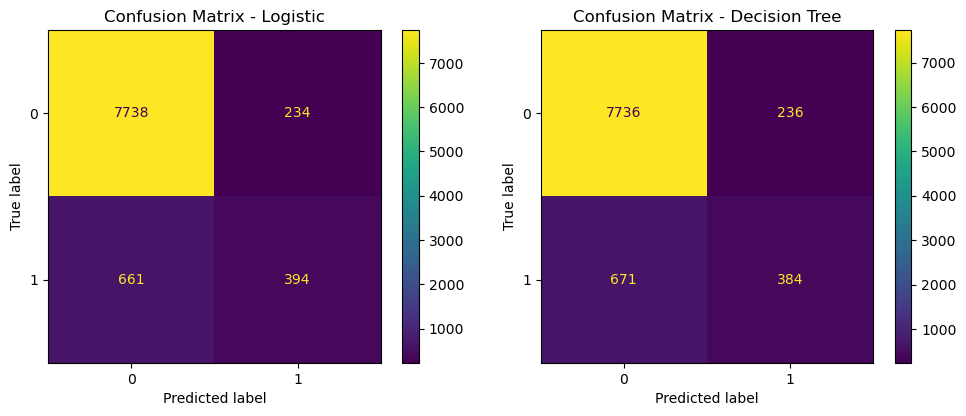

In [78]:
# Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_predictions(Y_test_s, Y_pred_s, ax=axs[0])

axs[0].set_title("Confusion Matrix - Logistic")

ConfusionMatrixDisplay.from_predictions(Y_test_s, Y_pred_gini, ax=axs[1])

axs[1].set_title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

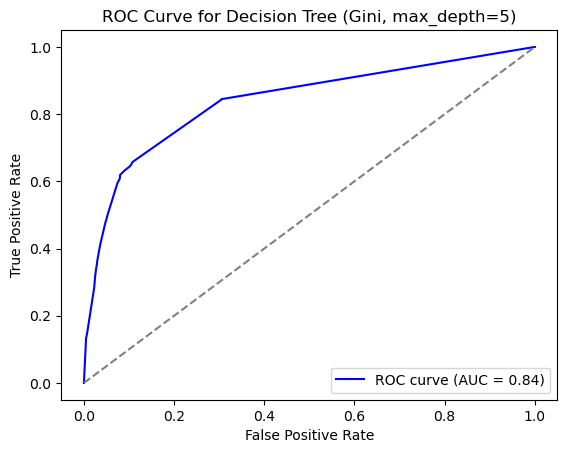

In [138]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
Y_probs = clf_gini.predict_proba(X_test_s)[:, 1]

# Compute ROC curve metrics
fpr_t, tpr_t, thresholds = roc_curve(Y_test_s, Y_probs)

# Calculate the AUC score
#roc_auc = auc(fpr, tpr)
auc_t = roc_auc_score(Y_test_s, Y_probs)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree (Gini, max_depth=5)')
plt.legend(loc='lower right')
plt.show()


In [142]:
# ROC Curves
fpr, tpr, thresholds = roc_curve(Y_test_s, Y_pred_proba)
fpr_t, tpr_t, thresholds = roc_curve(Y_test_s, Y_probs)
auc_score = roc_auc_score(Y_test_s, Y_pred_proba)
auc_t = roc_auc_score(Y_test_s, Y_probs)

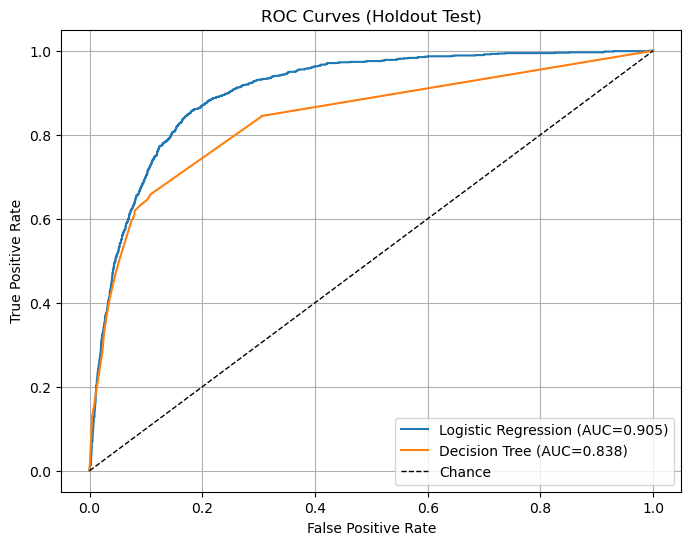

In [144]:
# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc_score:.3f})')
plt.plot(fpr_t, tpr_t, label=f'Decision Tree (AUC={auc_t:.3f})')
plt.plot([0,1],[0,1],'k--',linewidth=1,label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Holdout Test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
